## Car Price Prediction Project plan
- Prepare data and do EDA (Exploratory Data Analysis)
- Use linear regression for predicting price
- Understand the internals of linear regression
- Evaluating the model with RMSE (root mean square error)
- Feature engineering (creating new features/characteristics)
- Regularization
- Using the model

## Machine Learning for Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'

In [ ]:
!wget $data

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#Clean data
#Make columns and data be consistent

df.columns = df.columns.str.lower().str.replace(' ', '_') #converts everything to lower caps and changes space with _

string_columns = df.dtypes[df.dtypes == 'object'].index
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory Data Analysis

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique()) #counts number of unique values in a column
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

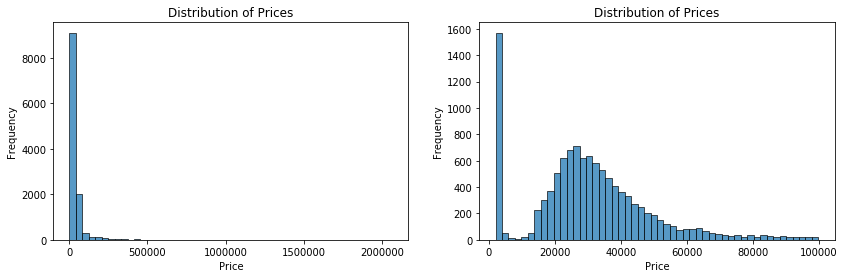

In [7]:
#Distribution of Price

plt.figure(figsize = (14,4))

plt.subplot(121)
sns.histplot(df.msrp, bins = 50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

plt.subplot(122)
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [8]:
#Getting rid of the the tail in our long-tail distribution (not good for machine learning) by logarithms

log_price = np.log1p(df.msrp) #adds 1 to all values to remove the 0 value

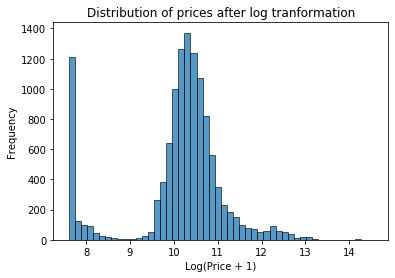

In [9]:
sns.histplot(log_price, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [10]:
#Missing values - counts the number of missing values for each column

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the Validation Framework
- Three parts: Training set (60%), validation set (20%), testing set(20%) (Machine Learning)

In [11]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test #cannot use int(n*0.6) because of rounding issues

n_val, n_test, n_train

(2382, 2382, 7150)

In [12]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

##NOT RANDOMIZED!

In [13]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [15]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [16]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [17]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [18]:
del df_train['msrp'] #delete to not use a feature since it is the one we're predicting
del df_val['msrp']
del df_test['msrp']

### Linear Regression

### $g(x_i) = w_0 + \sum_{j=0}^{n-1}w_j\cdot x_{i,j}$

In [19]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                    453
engine_cylinders                              12
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                                2
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [20]:
#Summary of linear regression

xi = [453,11,86] #car features

w0 = 7.17
w = [0.01,0.04,0.002]

def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j]*xi[j]
        
    return pred

linear_regression(xi)

12.312

In [21]:
np.expm1(12.312) #our final price prediction

222347.2221101062

### Linear Regression: Vector Form

### $g(x_i) = w_0 + x_i^T\cdot w$

In [22]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [23]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [24]:
#combine w0 to w to simplify code

w_new = [w0] + w

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [25]:
##using multiple data
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)

print(X.dot(w_new)) #prediction of prices for each list of data (can be X @ w_new)

#or

def linear_regression(X):
    return X.dot(w_new)

print(linear_regression(X))

[12.38  13.552 12.312]
[12.38  13.552 12.312]


### Training Linear Regression: Normal Equation

How to get the value of w:
### $w = (X^TX)^{-1}X^Ty$

In [52]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [40]:
ones = np.ones(X.shape[0])

In [41]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [42]:
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [43]:
XTX = X.T@X

In [44]:
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [45]:
XTX_inv = np.linalg.inv(XTX)

In [46]:
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [47]:
w_full = XTX_inv @ X.T @ y

In [48]:
w0 = w_full[0]
w = w_full[1:]

In [49]:
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [55]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y
    
    return w_full[0], w_full[1:]

In [56]:
train_linear_regression(X,y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

### Car price baseline model

In [57]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [58]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train @ w

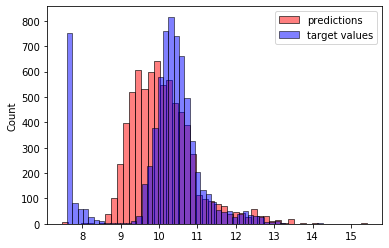

In [59]:
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5, label = 'predictions')
sns.histplot(y_train, color = 'blue', bins = 50, alpha = 0.5, label = 'target values')

plt.legend()
plt.show()

### Root Mean Squared Error (RMSE)

In [60]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    rmse = np.sqrt(mse)
    
    return rmse

In [61]:
rmse(y_train, y_pred)

0.7554192603920132

### Computing RMSE on Validation Data

In [62]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [63]:
#Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val @ w

rmse(y_val, y_pred)

0.7616530991301601

### Feature Engineering

In [64]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [65]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val @ w

rmse(y_val, y_pred)

0.5172055461058335

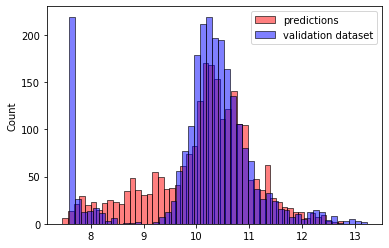

In [67]:
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5, label = 'predictions')
sns.histplot(y_val, color = 'blue', bins = 50, alpha = 0.5, label = 'validation dataset')

plt.legend()
plt.show()

### Categorical Variables
- variables that are not numbers
- typically they are strings

In [79]:
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
#OR
for v in [2,3,4]:
    df_train['num_doors_%s'%v] = (df_train.number_of_doors == v).astype('int')

In [80]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [83]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s'%v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s'%v)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [84]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val @ w

rmse(y_val, y_pred)

0.5157995641502352

In [90]:
makes = list(df.make.value_counts().head().index)

In [93]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s'%v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s'%v)
    
    for v in makes:
        df['make_%s'%v] = (df.make == v).astype('int')
        features.append('make_%s'%v)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [94]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val @ w

rmse(y_val, y_pred)

0.5076038849557034

In [96]:
##Copied from mastercode

def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [97]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val @ w

rmse(y_val, y_pred)

830.8920785817741

In [98]:
### Something made wrong, very very high RMSE

### Regularization

In [127]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.00000001]
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [128]:
XTX = X.T @ X
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [129]:
XTX_inv = np.linalg.inv(XTX) #error if there are duplicate columns
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [130]:
y = [1,2,3,1,2,3]

In [131]:
XTX_inv @ X.T @ y

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [140]:
XTX = [
    [1,2,2],
    [2,1,1.00001],
    [2,1.00001,1]
]

XTX = np.array(XTX)

In [141]:
np.linalg.inv(XTX)

array([[-3.33335556e-01,  3.33333889e-01,  3.33333889e-01],
       [ 3.33333889e-01, -5.00000833e+04,  4.99999167e+04],
       [ 3.33333889e-01,  4.99999167e+04, -5.00000833e+04]])

In [148]:
XTX = XTX + 0.01 * np.eye(3) #0.01 = regulation number which regulates our XTX matrix

In [149]:
np.linalg.inv(XTX)

array([[ -0.34009251,   0.33672359,   0.33672359],
       [  0.33672359,  24.92664174, -25.09837077],
       [  0.33672359, -25.09837077,  24.92664174]])

In [150]:
def train_linear_regression_reg(X,y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T @ X
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y
    
    return w_full[0], w_full[1:]

In [151]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val @ w

rmse(y_val, y_pred)

0.4602394963262388

### Tuning the Model
- what is the best value for r

In [152]:
for r in [0.0, 0.00001, 0.001, 0.01, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)

    #validation
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val @ w

    score = rmse(y_val, y_pred)
    print(r,w0, score)

0.0 -6.947006956027172e+17 830.8920785817741
1e-05 -4.857861871205197 0.46022537843983563
0.001 7.1948459400515485 0.460226762660452
0.01 7.181698786196669 0.4602394963262388
1 6.219919390069965 0.46182980426538967
10 4.389924340542246 0.47572481006935274


In [153]:
#best is 0.001 i think

### Using the Model

In [165]:
df_full_train = pd.concat([df_train, df_val], sort = False)

df_full_train = df_full_train.reset_index(drop = True)

In [166]:
X_full_train = prepare_X(df_full_train)

In [167]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [168]:
y_full_train = np.concatenate([y_train, y_val])

In [172]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test @ w

rmse(y_val, y_pred)

1.462131278493491